In [2]:
# Import packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas
import time
from dotenv import load_dotenv
import os
from etl.Notebooks.etl_utils import extract_query

In [3]:
load_dotenv()

# Create db connection string
db_username = os.getenv("DB_USERNAME")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_conn_str = f"mysql+pymysql://{db_username}:{db_password}@{db_host}:{db_port}/tsx_composite_index"

In [4]:
# Import ticker list
import_query = """
SELECT yfinance_ticker, company_id
FROM ticker_history
WHERE end_date IS NULL
"""

ticker_list = extract_query(sql_query=import_query, db_conn_str=db_conn_str)

Connection Successful!
SQL script executed successfully!


In [20]:
batch_sizes = [1, 5, 10, 25, 50]
time_elapsed = []

In [21]:
for size in batch_sizes:
    start = time.time()
    # Do individually
    if size == 1:
        for ticker in ticker_list["yfinance_ticker"].to_list():
            _ticker = yf.Ticker(ticker)
            _ticker.history(start = '2025-11-01', end = '2025-11-30')
    # Do in batches
    if size > 1:
        i = 0
        while i < len(ticker_list):
            _tickers = yf.Tickers(ticker_list['yfinance_ticker'].iloc[i:i+size].to_list())
            _tickers.history(start = '2025-11-01', end = '2025-11-30')
            i += size
    end = time.time()

    # Append time
    time_elapsed.append(end - start)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%********

In [22]:
time_elapsed

[19.678629159927368,
 10.793894290924072,
 10.208597183227539,
 6.982071876525879,
 6.458399295806885]

Text(0, 0.5, 'Time Elapsed (seconds)')

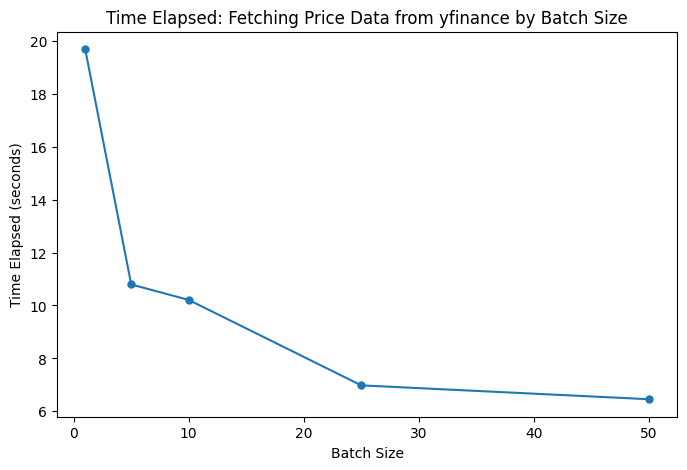

In [23]:
# Plot
plt.figure(figsize=(8,5))
plt.plot(batch_sizes, time_elapsed, marker='o', ms=5)
plt.title("Time Elapsed: Fetching Price Data from yfinance by Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Time Elapsed (seconds)")

CONCLUSION: batch price fetching by as much as feasible for improved speed performance